In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("../data/cleaned_data.csv")

In [23]:
df.head()

,complaint,category
0,"Rly station gets bag scanner, still lacks adeq...",security
1,The sensitivity of towards the corridor betw...,journey
2,If you have Loyalty points then you can easil...,journey
3,"Dear sir, I am travelling to ghazipur by 22434...",journey
4,The sensitivity of towards the corridor betw...,journey


In [24]:
df.shape

(562, 2)

In [25]:
df['category_id'] = df['category'].factorize()[0]

In [26]:
df.tail(10)

,complaint,category,category_id
552,bGenerator Van of GariRath is apparently makin...,digital,3
553,Train no. 12224 Duronto Express coach B6. Air ...,digital,3
554,Vlog On Journey From Delhi To Mumbai By Train...,journey,1
555,ko sudhar to payi nhi me fir se chahiye.,others,4
556,"Did you know, takes 25 crore passengers daily...",others,4
557,Travelling by train no. 12701 to Hyderabad. Th...,journey,1
558,"Targets for 2019-20 set at 10,319 km on",others,4
559,The haunting beauty of a solitary rail line in...,others,4
560,I am in 14055 Brahmputra Express. PNR No. 6527...,clean,2
561,PNR 8717284054 pehle bole hotte toh pillow sat...,health,5


In [27]:
cat_id_df = df[["category", "category_id"]].drop_duplicates().sort_values('category_id')

In [28]:
cat_to_id = dict(cat_id_df.values)

In [29]:
cat_id_df

,category,category_id
0,security,0
1,journey,1
6,clean,2
9,digital,3
13,others,4
36,health,5
37,food,6


In [30]:
cat_to_id

{'security': 0,
 'journey': 1,
 'clean': 2,
 'digital': 3,
 'others': 4,
 'health': 5,
 'food': 6}

In [31]:
id_to_cat = dict(cat_id_df[['category_id','category']].values)

In [32]:
id_to_cat

{0: 'security',
 1: 'journey',
 2: 'clean',
 3: 'digital',
 4: 'others',
 5: 'health',
 6: 'food'}

In [33]:
df.head()

,complaint,category,category_id
0,"Rly station gets bag scanner, still lacks adeq...",security,0
1,The sensitivity of towards the corridor betw...,journey,1
2,If you have Loyalty points then you can easil...,journey,1
3,"Dear sir, I am travelling to ghazipur by 22434...",journey,1
4,The sensitivity of towards the corridor betw...,journey,1


In [35]:
fig = plt.figure(figsize= (8,6))

<Figure size 576x432 with 0 Axes>

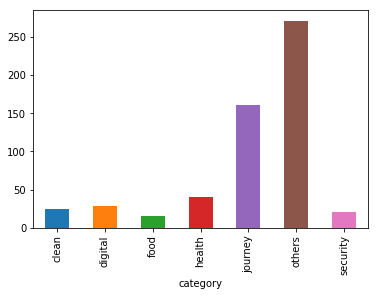

In [37]:
df.groupby('category').complaint.count().plot.bar(ylim=0)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [40]:
features = tfidf.fit_transform(df.complaint).toarray()

In [41]:
labels = df.category_id
features.shape

(562, 305)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df['complaint'], df['category'], random_state= 0)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
count_vect = CountVectorizer()

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer

In [47]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [56]:
X_train

225    Sahibabad railway station of NR (Northern Rail...
428    There have been a huge discrepancy in recent A...
137    Thank you issue solved in few minutes    thank...
354    Trains between Bhopal(bpl) And Delhi(ndls) sta...
7               cant be trusted in emergency situation. 
554    Vlog On Journey From Delhi To Mumbai By  Train...
518    Microsoft Kaizala enables Indian Railways to c...
190    Enjoy the best of captivating hill station in ...
546    Diesel lobby reigns supreme and thus 100s of d...
427    register its best safety figures in almost fou...
101    Door is not properly closing in A1 in 12842 on...
97     bAgain indian railway service... my wif travel...
231    GHY-Okha Express decorated with voters awarene...
153    ADORNED BY BETTA  A silent .. peaceful country...
54     A 58-year-old widow of a railway employee in C...
30     Worst maintenance of train coach no door lock ...
560    I am in 14055 Brahmputra Express. PNR No. 6527...
49     Illegal coal trafficking

In [48]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [55]:
print(clf.predict(count_vect.transform(['website is not working'])))

['digital']


In [50]:
y_pred = clf.predict(count_vect.transform(X_test))

In [51]:
from sklearn import metrics

In [52]:
print(metrics.classification_report(y_test,y_pred, labels= df.category, target_names=df['category'].unique()))

              precision    recall  f1-score   support

    security       0.00      0.00      0.00         7
     journey       0.55      1.00      0.71        41
       clean       0.55      1.00      0.71        41
     digital       0.55      1.00      0.71        41
      others       0.55      1.00      0.71        41
      health       0.55      1.00      0.71        41
        food       0.33      0.50      0.40         4

   micro avg       0.70      0.65      0.67     25183
   macro avg       0.69      0.65      0.63     25183
weighted avg       0.77      0.65      0.66     25183



/home/skj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1537: UserWarning: labels size, 562, does not match size of target_names, 7
  .format(len(labels), len(target_names))
/home/skj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Pickling ( classifier and vectorizer)

In [57]:
import pickle as pkl

In [68]:
f = open("classifier.pickle", "wb")
pkl.dump(clf,f)

In [72]:
f.close()

In [71]:
f = open("vectorizer.pickle", "wb")
pkl.dump(count_vect, f)

In [78]:
ccl = pkl.load(open('vectorizer.pickle', 'rb'))

In [81]:
print(clf.predict(ccl.transform(['hello'])))

['others']


In [82]:
clf.predict(count_vect.transform(['website is not working']))

array(['digital'], dtype=object)